# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [10]:
#Importar programas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Carregar arquivo que será trabalhado
df = pd.read_csv("/content/SINASC_RO_2019.csv", sep=',')

In [5]:
#Verificar se foi carregado da forma correta
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [8]:
#Utilizando .loc para adicionar as informações na nova coluna "CAT_APGAR5"
df.loc[df["APGAR5"] <= 3, "CAT_APGAR5"] = "ASFIXIA_SEVERA"
df.loc[(df["APGAR5"] >= 4) & (df["APGAR5"] <=5), "CAT_APGAR5"] = "ASFIXIA_MODERADA"
df.loc[(df["APGAR5"] >= 6) & (df["APGAR5"] <=7), "CAT_APGAR5"] = "ASFIXIA_LEVE"
df.loc[df["APGAR5"] >= 8 ,"CAT_APGAR5"] = "NORMAL"

print(df[["APGAR5", "CAT_APGAR5"]])

       APGAR5 CAT_APGAR5
0        10.0     NORMAL
1         9.0     NORMAL
2        10.0     NORMAL
3        10.0     NORMAL
4        10.0     NORMAL
...       ...        ...
27023     9.0     NORMAL
27024     9.0     NORMAL
27025    10.0     NORMAL
27026     9.0     NORMAL
27027     8.0     NORMAL

[27028 rows x 2 columns]


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='GESTACAO', ylabel='APGAR5'>

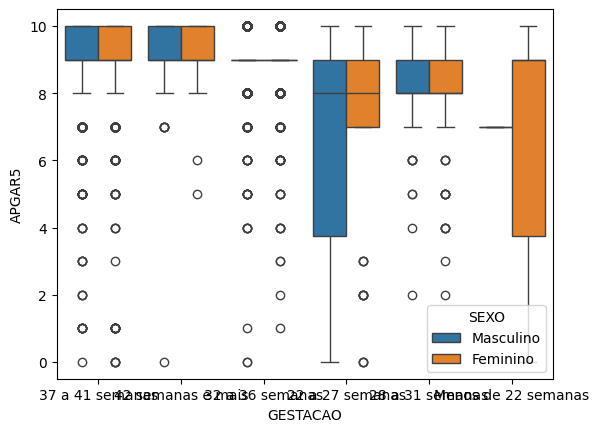

In [12]:
sns.boxplot(data=df, x='GESTACAO', y='APGAR5', hue='SEXO')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [14]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])
print(tabela_cruzada)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [15]:
tabela_percentual = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100
print(tabela_percentual)

APGAR5                    0.0       1.0        2.0       3.0       4.0   \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089526  0.089526   0.089526  0.089526  0.358102   
37 a 41 semanas       0.022200  0.088798   0.013320  0.022200  0.031079   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   

APGAR5                   5.0       6.0        7.0        8.0        9.0   \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas      0.492390  0.760967   2.506714  16.204118  58.504924   
37 a 41 semanas    

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

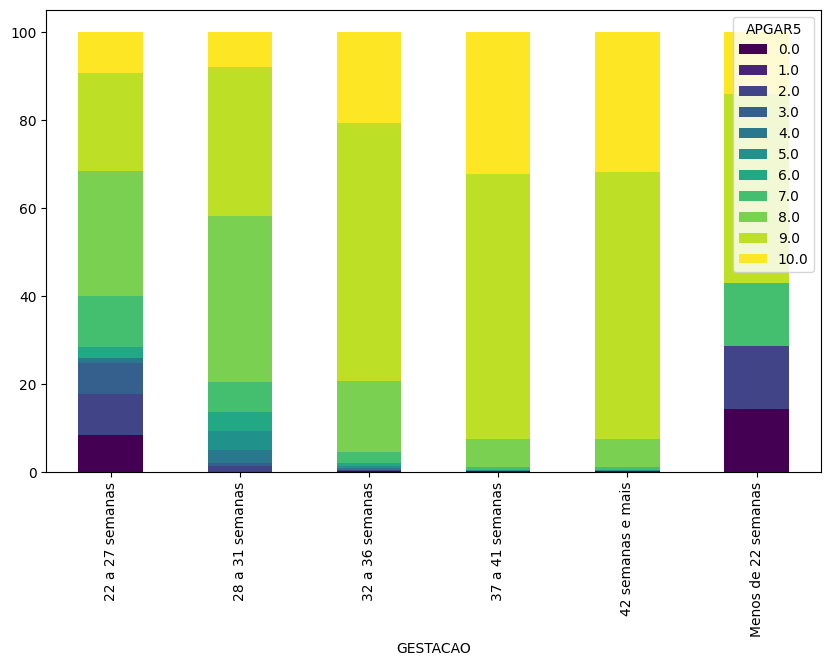

In [16]:
tabela_percentual.plot(kind='bar', stacked=True, colormap="viridis", figsize=(10, 6))

#resposta: conforme o bebê nasce com menos semanas, maiores as taxas de asfixias mais altas, corroborando com a hipótese dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='PESO', ylabel='APGAR5'>

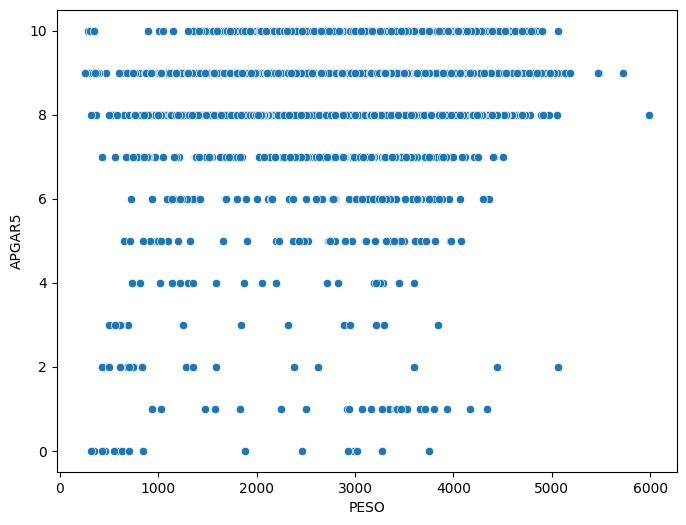

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PESO', y='APGAR5', data=df)

#resposta: existe uma boa relação entre o peso da criança e o seu score no APGAR5, indicando que bebês mais pesados tendem a ter menos problemas com asfixia.